In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import gym

In [3]:
# import pygame

## Load GYM environment

In [4]:
env = gym.make('FrozenLake-v1', is_slippery=False)

NUM_STATES = env.observation_space.n
NUM_ACTIONS = env.action_space.n

print('States: {}'.format(NUM_STATES))
print('Actions: {}'.format(NUM_ACTIONS))

States: 16
Actions: 4


## Settings

In [5]:
lr = 0.8
gamma = 0.95

NUM_EPISODES = 3000
MAX_STEPS = 100
REWARD_AVERAGE_WINDOW = 20

##  Q-Table initialization

In [6]:
Q = np.zeros([NUM_STATES, NUM_ACTIONS])

pathLenList = []
totalRewardList = []
totalRewardAverageList = []

##  Q-Table learning

In [7]:
for i in range(NUM_EPISODES):
    
    eps = 1.0 - float(i) / NUM_EPISODES

    s = env.reset()

    totalReward = 0
    step = 0

    while step < MAX_STEPS:
        step += 1
        
        if np.random.rand() < eps:
            a = env.action_space.sample()
        else:
            a = np.argmax(Q[s,:])
        
        s1, r, done, _ = env.step(a)
        
        if done:
            Q_target = r
        else:
            Q_target = r + gamma * np.max(Q[s1,:])
            
        Q[s,a] = (1-lr) * Q[s,a] + lr * Q_target
        
        totalReward += r
        s = s1
        
        if done:
            break
     
    pathLenList.append(step)
    totalRewardList.append(totalReward)
    
    if i % REWARD_AVERAGE_WINDOW == 0 and i >= REWARD_AVERAGE_WINDOW:
        totalRewardAverage = np.mean(totalRewardList[-REWARD_AVERAGE_WINDOW:])
        totalRewardAverageList.append(totalRewardAverage)
        if i % 100 == 0:
            print('Episode {}: average total reward = {}'.format(i, totalRewardAverage))

Episode 100: average total reward = 0.0
Episode 200: average total reward = 0.05
Episode 300: average total reward = 0.05
Episode 400: average total reward = 0.0
Episode 500: average total reward = 0.0
Episode 600: average total reward = 0.15
Episode 700: average total reward = 0.3
Episode 800: average total reward = 0.25
Episode 900: average total reward = 0.15
Episode 1000: average total reward = 0.45
Episode 1100: average total reward = 0.2
Episode 1200: average total reward = 0.2
Episode 1300: average total reward = 0.25
Episode 1400: average total reward = 0.45
Episode 1500: average total reward = 0.35
Episode 1600: average total reward = 0.6
Episode 1700: average total reward = 0.35
Episode 1800: average total reward = 0.45
Episode 1900: average total reward = 0.7
Episode 2000: average total reward = 0.8
Episode 2100: average total reward = 0.7
Episode 2200: average total reward = 0.7
Episode 2300: average total reward = 0.9
Episode 2400: average total reward = 0.8
Episode 2500: 

## Q-Table

In [8]:
print(Q)

[[0.73509189 0.77378094 0.77378094 0.73509189]
 [0.73509189 0.         0.81450625 0.77378094]
 [0.77378094 0.857375   0.77378094 0.81450625]
 [0.81450625 0.         0.77378094 0.77378094]
 [0.77378094 0.81450625 0.         0.73509189]
 [0.         0.         0.         0.        ]
 [0.         0.9025     0.         0.81450625]
 [0.         0.         0.         0.        ]
 [0.81450625 0.         0.857375   0.77378094]
 [0.81450625 0.9025     0.9025     0.        ]
 [0.857375   0.95       0.         0.857375  ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.9025     0.95       0.857375  ]
 [0.9025     0.95       1.         0.9025    ]
 [0.         0.         0.         0.        ]]


## Plot trajectory length over time

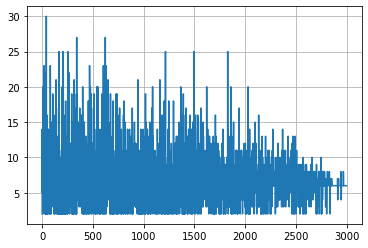

In [9]:
plt.plot(pathLenList)
plt.grid()

## Plot average total reward over time

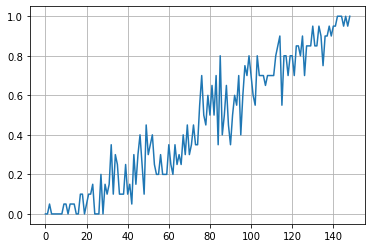

In [10]:
plt.plot(totalRewardAverageList)
plt.grid()

## Run simulation

In [11]:
USE_Q = True

s = env.reset()

for N in range(1000):
    env.render()
    if USE_Q:
        a = np.argmax(Q[s,:])
    else:
        a = env.action_space.sample()
        
#     print('a = ', a)
    s, r, done, _ = env.step(a)
#     print('s, r, done:', s, r, done)
    if done:
        env.render()
        print('Reward = {}'.format(r))
        break
        
env.close()


SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
Reward = 1.0


In [8]:
USE_Q = False # True

s = env.reset()

for N in range(1000):
    env.render()
    if USE_Q:
        a = np.argmax(Q[s,:])
    else:
        a = env.action_space.sample()
    # print('a = ', a)
    s, r, done, _ = env.step(a)
    # print('s, r, done:', s, r, done)
    if done:
        env.render()
        # print('Reward = {}'.format(r))
        
        if r == 1:
            print('Эпизодов: ', N)
            print('a = ', a)
            print('s, r, done:', s, r, done)
            break
        else:
            s = env.reset()
            continue
        
env.close()


SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG

SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG

SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG

SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG

SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG

SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG

SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
